# <center> Ансамбли моделей
**Задание 1.2**  
Задана функция $x^2 + xy - 4y$.

Найдите для неё значение градиента в точке $(1;2)$. В качестве ответа введите длину градиента.

In [29]:
import numpy as np
import sympy as sp
import pandas as pd
import plotly.express as px
import plotly.io as pio

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestRegressor
from sklearn.metrics import f1_score, mean_absolute_error
from sklearn.model_selection import train_test_split

pio.renderers.default = 'png'
pio.templates.default = 'plotly_dark'

In [3]:
x, y = sp.symbols('x y', real=True)
f = x**2 + x*y - 4*y
point = {'x': 1, 'y': 2}
grad = sp.Matrix([f.diff(x), f.diff(y)])
grad_point = grad.subs(x, point['x']).subs(y, point['y'])
grad_length = np.linalg.norm(sp.matrix2numpy(grad_point, dtype=float))
print('Функция')
display(f)
print('Градиент')
display(grad)
print('Градиент в точке (1; 2)')
display(grad_point)
print(f'Длина градиента в точке (1; 2): {grad_length}')

Функция


x**2 + x*y - 4*y

Градиент


Matrix([
[2*x + y],
[  x - 4]])

Градиент в точке (1; 2)


Matrix([
[ 4],
[-3]])

Длина градиента в точке (1; 2): 5.0


**Задание 1.6**  
Найдите математическое ожидание для дискретной случайной величины, распределение которой задано следующим образом:

|X|1|2|3|4|
|-|-|-|-|-|
|P|0.2|0.1|0.6|0.1|


In [4]:
round((1*0.2) + (2*0.1) + (3*0.6) + (4*0.1), 1)

2.6

**Задание 1.7**  
Найдите минимум функции $ x^2 + xy - y + y^3 $.


In [5]:
f = x**2 + x*y - y + y**3
diffs = f.diff(x), f.diff(y)
solve = sp.solve(diffs, [x, y])
print('Точки экстремума:', solve)
print('f(-1/3; 2/3) =', f.subs(x, solve[0][0]).subs(y, solve[0][1]))
print('f(1/4; -1/2) =', f.subs(x, solve[1][0]).subs(y, solve[1][1]))

Точки экстремума: [(-1/3, 2/3), (1/4, -1/2)]
f(-1/3; 2/3) = -13/27
f(1/4; -1/2) = 5/16


Точка минимума: $ (-\frac{1}{3}; \frac{2}{3}) $

***
**Задание 2.7**  
* Подготовьте данные к классификации. Условно разделите вино на хорошее и плохое. Хорошим вином будем называть то, параметр `quality` которого — `6` и более.
* Сравните несколько методов классификации: логистическую регрессию, дерево решений и бэггинг. Это позволит вам увидеть, как меняется качество в зависимости от выбора того или иного алгоритма.
* Разделите выборку на обучающую и тестовую в соотношении `70/30`, в качестве значения параметра `random_state` возьмите число `42`.
* Для начала обучите два классификатора: логистическую регрессию (с параметрами по умолчанию) и дерево решений (`random_state = 42`, максимальная глубина — `10`).

In [6]:
data = pd.read_csv('data/wineQualityReds.zip', index_col=0)
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
data['quality'] = data['quality'].apply(lambda quality: int(quality >= 6))
data['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [8]:
X, y = data.drop(columns='quality'), data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

logreg_model = LogisticRegression().fit(X_train, y_train)
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10).fit(X_train, y_train)

print(
    'LogisticRegression F1-score:', f1_score(y_test, logreg_model.predict(X_test)).round(3),
    '\nDecisionTreeClassifier F1-score:', f1_score(y_test, dt_model.predict(X_test)).round(3)
)

LogisticRegression F1-score: 0.753 
DecisionTreeClassifier F1-score: 0.793


C:\Users\sadeyes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [9]:
bagging_model = BaggingClassifier(
    estimator=dt_model,
    n_estimators=1500,
    n_jobs=-1,
    random_state=42
).fit(X_train, y_train)

print('BaggingClassifier F1-score:', f1_score(y_test, bagging_model.predict(X_test)).round(3))

BaggingClassifier F1-score: 0.818


***
**Задание 3.4**  

In [10]:
data = pd.read_csv('data/boston__1_.zip')
data.head()

,crim_rate,zn,business,river,nit_oxiden,rooms,age,dist,highways_index,tax,pup_per_teaс,lower,target
0,"0,00632",18,"2,31",0,"0,538","6,575","65,2","4,09",1,296,"15,3","4,98",24
1,"0,02731",0,"7,07",0,"0,469","6,421","78,9","4,9671",2,242,"17,8","9,14","21,6"
2,"0,02729",0,"7,07",0,"0,469","7,185","61,1","4,9671",2,242,"17,8","4,03","34,7"
3,"0,03237",0,"2,18",0,"0,458","6,998","45,8","6,0622",3,222,"18,7","2,94","33,4"
4,"0,06905",0,"2,18",0,"0,458","7,147","54,2","6,0622",3,222,"18,7","5,33","36,2"


In [26]:
data = data.applymap(lambda x: float(str(x).replace(',', '.')))

In [27]:
X, y = data.drop(columns='target'), data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.3)

round(y_train.mean(), 2)

22.77

In [30]:
lr_model = LinearRegression().fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print('LinearRegression MAE:', mean_absolute_error(y_test, y_pred).round(2))

LinearRegression MAE: 3.72


In [31]:
dt_model = DecisionTreeRegressor(random_state=13).fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print('DecisionTreeRegressor MAE:', mean_absolute_error(y_test, y_pred).round(2))

DecisionTreeRegressor MAE: 2.84


In [32]:
tree_estimators = [3, 10, 100, 500]
result = []

for n_estimators in tree_estimators:
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=13, n_jobs=-1).fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    result.append(mean_absolute_error(y_test, y_pred))
    
best_index = np.argmin(result)
min_res = round(min(result), 2)
print(f'RandomForestRegressor(n_estimators={tree_estimators[best_index]}) MAE: {min_res}')

RandomForestRegressor(n_estimators=500) MAE: 2.24


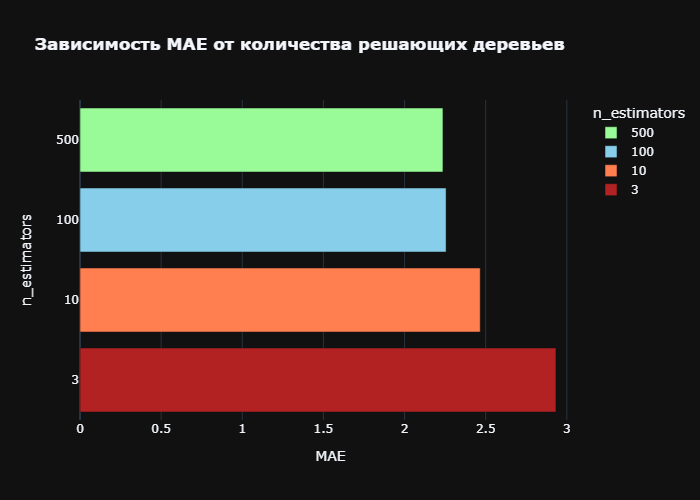

In [45]:
plot_df = pd.DataFrame({
    'n_estimators': tree_estimators,
    'MAE': result
}).sort_values(by='MAE')
plot_df['n_estimators'] = plot_df['n_estimators'].astype(str)
px.bar(
    data_frame=plot_df,
    x='MAE',
    y='n_estimators',
    height=500,
    width=700,
    title='<b>Зависимость MAE от количества решающих деревьев<b>',
    color='n_estimators',
    color_discrete_sequence=['PaleGreen', 'SkyBlue', 'Coral', 'FireBrick']
).show()